In [ ]:
from google.colab import drive
drive.mount('/gdrive/')
!cp -a "/gdrive/My Drive/258_Project_Files/." "/content/"

In [ ]:
#!pip3 install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.5 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633961 sha256=bb81ba99fff07ccdfe0caefd83e8f8ec1f0b8ffbd59978eb01efe1bc8e21efd4
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
import csv
import random
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import scipy
#from surprise import SVD, Reader, Dataset
#from surprise.model_selection import train_test_split

In [ ]:
def parse_csv(path):
  f = open(path, 'rt')
  dataset = []
  r = csv.reader(f)
  for row in r:
    dataset.append(row)
  dataset = dataset[1:]
  return dataset

def mse(y, y_pred):
  return np.mean((np.array(y) - np.array(y_pred))**2)

In [ ]:
dataset = parse_csv("/content/user_ratings.csv")

In [ ]:
dataset_np = np.array(dataset)

In [ ]:
print(dataset_np[:,1].shape)

(18942215,)


In [ ]:
ratings = np.array(dataset_np[:,1], dtype=float)
print(ratings[:10])
ratings_mean = np.mean(ratings)
ratings_std = np.std(ratings)
print(ratings_mean)
print(ratings_std)

[8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
7.130957150327989
1.5430227714116684


In [ ]:
print(dataset[0])

['213788', '8.0', 'Tonydorrf']


In [ ]:
random.shuffle(dataset)

In [ ]:
# entries are [gameID, rating, username]
trainset = dataset[:200000]
testset = dataset[200000:400000]

In [ ]:
id_counts_train = defaultdict(int)
for id, rating, username in trainset:
  id_counts_train[id] += 1

id_counts_all = defaultdict(int)
user_counts_all = defaultdict(int)
for id, rating, username in dataset:
  id_counts_all[id] += 1
  user_counts_all[username] += 1

In [ ]:
total = 0
min_count = np.inf
max_count = -np.inf
for id in id_counts_train:
  count = id_counts_train[id]
  total += count
  if count < min_count:
    min_count = count
  if count > max_count:
    max_count = count

In [ ]:
avg_count = total / len(id_counts_all)
print(avg_count)
print(min_count)
print(max_count)

9.122006841505131
1
1146


In [ ]:
num_less_than_10 = 0
for id in id_counts_all:
  if id_counts_all[id] < 2:
    num_less_than_10 += 1
print(num_less_than_10)

0


In [ ]:
num_less_than_10 = 0
for user in user_counts_all:
  if user_counts_all[user] < 10:
    num_less_than_10 += 1
print(num_less_than_10)

186770


In [ ]:
mechanics = parse_csv("/content/mechanics.csv")
mechanics = np.array(mechanics, dtype=int)[:,1:]

In [ ]:
print(mechanics.shape)
print(mechanics[0])

(21925, 157)
[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
mechanic_counts = np.sum(mechanics, axis=0)
print(mechanic_counts)

[  37 1639 1157 6486 4496 1184  402 2438   41 2959 1832 1183   33   79
  228  308   71  218  833  560 1716  588  941   30  687  637  937   98
  248   26  365 1371 2736  423   50 1643   23   39  502  469  337  559
  732  547  514 2134  315 1202  259 1572 1199   41   62   25 1548 1015
   26   53   53  593   41  308 1142 1036  561   58   32  264   56   44
   35   36   18  600   21   41   23   29   95  164   30   10   26   10
   31   43   15  973  276   50   25  276   19  180  107  849   98   35
  803   30   37   47   15   81   92   49 2015  175   16   41   30   22
   24   27   53   13   46   99   36   45   38   17  501   35   32   85
   16   56  123   99   29   14   67   11   24   17  787   43   28   29
   10   17   40   19   44   24    9  137    5   19   62   15   64   16
   32 1105  459]


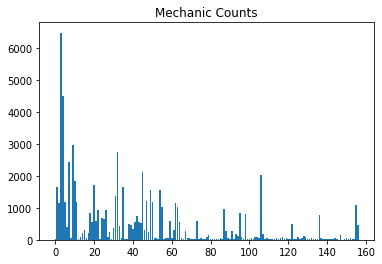

In [ ]:
plt.bar(range(len(mechanic_counts)), mechanic_counts)
plt.title('Mechanic Counts')
plt.show()

In [ ]:
print(np.argpartition(mechanic_counts, -3)[-3:])

[9 4 3]


In [ ]:
games = parse_csv("/content/games.csv")

In [ ]:
print(games[0][2])

die macher game seven sequential political race different region germany player charge national political party manage limited resource help party victory win party victory point regional election different way score victory point regional election supply eighty victory point depend size region party second party win regional election medium influence region party receive mediacontrol victory point party national party membership grow game progress supply fair number victory point lastly party score victory point party platform match national opinion end gamethe   edition feature party old west germany support   player   edition support player reunite germany update feature rule     edition support player add short fiveround variant additional rule update original designer


In [ ]:
desc_lens = [len(row[2].split()) for row in games]

In [ ]:
print(len(desc_lens))

[107, 77, 88, 48, 362]


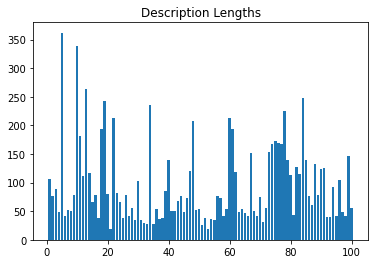

In [ ]:
plt.bar(range(1,101), desc_lens[:100])
plt.title('Description Lengths')
plt.show()

In [ ]:
print(max(desc_lens))
print(min([length for length in desc_lens if length != 0]))
print(len([length for length in desc_lens if length == 0]))

1263
3
1


-3500
2021
[ 309  352  817 1336  902 1188 1859 2854 4206 6515 1587]


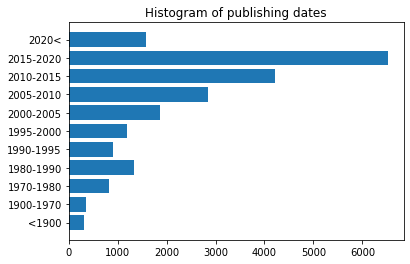

In [ ]:
dates = [int(row[3]) for row in games]
dates = np.array(dates)
min_date = np.min(dates)
max_date = np.max(dates)
print(min_date)
print(max_date)
bin_edges = [-3500, 1900, 1970, 1980, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
hist, edges = np.histogram(dates, bins=bin_edges)
print(hist)
L = ["<1900", "1900-1970", "1970-1980", "1980-1990", "1990-1995", "1995-2000", "2000-2005", "2005-2010", "2010-2015", "2015-2020", "2020<"]
fig, ax = plt.subplots()
ax.barh(range(len(hist)), hist)
ax.set_title("Histogram of publishing dates")
ax.set_yticks(range(len(hist)))
ax.set_yticklabels(labels = L)
plt.show()

In [ ]:
interactions = parse_csv("/content/user_ratings.csv")
random.shuffle(interactions)

In [ ]:
trainset = interactions[:400000]

In [ ]:
print(trainset[0])

['246784', '7.0', 'ReadingDude']


In [ ]:
bggid_to_idx = {}
for i in range(len(games)):
  bggid_to_idx[games[i][0]] = i

In [ ]:
# predict avg
y_pred = [float(games[bggid_to_idx[bggid]][5]) for bggid, _, _ in trainset]
y = [float(rating) for _,rating,_ in trainset]
print(mse(y_pred, y))

1.7694799206232408


In [ ]:
def G(bggid):
  return games[bggid_to_idx[bggid]]

In [ ]:
mechanics = parse_csv("/content/mechanics.csv")
mechanics = np.array(mechanics, dtype=int)[:,1:]

In [ ]:
def mechanics_jaccard(mec1, mec2):
  return (np.array(mec1) == np.array(mec2)).sum() / len(mec1)

In [ ]:
def M(bggid):
  return mechanics[bggid_to_idx[bggid]]

In [ ]:
ratingsPerUser = defaultdict(list)
for bggid, rating, user in trainset:
  ratingsPerUser[user].append([bggid, rating])

i = 0
for bggid, rating, user in trainset:
  if len(ratingsPerUser[user]) == 1:
    i += 1

print('Users with 1 rating:', i)
print('Number of Users:', len(ratingsPerUser))
print('Number of interactions:', len(trainset))

trainset_tuples = [(bggid, rating, user) for [bggid, rating, user] in trainset]
trainset_set = set(trainset_tuples)
for bggid, rating, user in trainset:
  if len(ratingsPerUser[user]) == 1:
    trainset_set.remove((bggid, rating, user))
trainset = list(trainset_set)
trainset = [[bggid, rating, user] for (bggid, rating, user) in trainset]
print('Number of interactions:', len(trainset))

KeyboardInterrupt: ignored

In [ ]:
def getFeaturesFromInteraction(bggid, user):
  # weighted top and bottom mechanical similarities
  ratings = ratingsPerUser[user]
  # remove current interaction from ratings so we don't use true rating as a feature
  ratings_dict = dict(ratings)
  ratings_dict.pop(bggid)
  ratings = list(tuple(ratings_dict.items()))

  if len(ratings) == 0:
    #print('error not enough ratings')
    return [0,0,0,0,0]

  feature = []
  # weighted average complexity
  feature.append(np.mean([float(rating)*float(G(bggid)[4]) for bggid, rating in ratings]))
  # weighted average player count
  feature.append(np.mean([float(rating)*float(G(bggid)[12]) for bggid, rating in ratings]))

  mec1 = M(bggid)
  simList = [[mechanics_jaccard(mec1, M(bggid2)), rating] for bggid2, rating in ratings]
  maxSim = max(simList)
  minSim = min(simList)
  feature.append(maxSim[0]*float(maxSim[1]))
  feature.append(minSim[0]*float(minSim[1]))
  feature.append(1)

  return feature

In [ ]:
features = [[G(bggid)[4], G(bggid)[5], G(bggid)[12], G(bggid)[14]] + \
            getFeaturesFromInteraction(bggid, user) for bggid, _, user in trainset]
labels = [float(rating) for _, rating, _ in trainset]

features = np.array(features, dtype=float)
labels = np.array(labels, dtype=float)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

In [ ]:
lin_mod = linear_model.LinearRegression().fit(X_train, y_train)
pred = lin_mod.predict(X_test)
pred = np.clip(pred, 1, 10)
print(mse(pred, y_test))

In [ ]:
def train_xgb_report_mse(lam):
  xgb_mod = XGBRegressor(reg_lambda = lam, objective='reg:squarederror').fit(X_train, y_train)
  pred = xgb_mod.predict(X_test)
  pred = np.clip(pred, 1, 10)
  print(lam, mse(pred, y_test))

In [ ]:
#reader = Reader(line_format='item rating user', sep=',', skip_lines=1, rating_scale = (1,10))
#data = Dataset.load_from_file("user_ratings.csv", reader=reader)

In [ ]:
'''
svd_mses = []
for trainsize in [200000, 400000, 600000, 800000, 1000000]:
  sur_trainset, sur_testset = train_test_split(data, test_size=(int)(.1*trainsize), train_size=trainsize)
  model = SVD(n_factors = 1, n_epochs = 20)
  model.fit(sur_trainset)
  predictions = model.test(sur_testset)

  sse = 0
  for p in predictions:
      sse += (p.r_ui - p.est)**2

  mse = sse / len(predictions)
  svd_mses.append(mse)

print(svd_mses)
'''
svd_mses = [1.8104595958356076, 1.6626494150973923, 1.642859755026103, 1.622981409687246, 1.5782401269353283]

In [ ]:
avg_mses, lin_mses, xgb_mses = [],[],[]
for trainsize in [200000, 400000, 600000, 800000, 1000000]:
  trainset = interactions[:trainsize]
  ratingsPerUser = defaultdict(list)
  for bggid, rating, user in trainset:
    ratingsPerUser[user].append([bggid, rating])

  y_pred = [float(games[bggid_to_idx[bggid]][5]) for bggid, _, _ in trainset]
  y = [float(rating) for _,rating,_ in trainset]
  avg_mses.append(mse(y_pred, y))

  features = [[G(bggid)[4], G(bggid)[5], G(bggid)[12], G(bggid)[14]] + \
            getFeaturesFromInteraction(bggid, user) for bggid, _, user in trainset]
  labels = [float(rating) for _, rating, _ in trainset]

  features = np.array(features, dtype=float)
  labels = np.array(labels, dtype=float)

  X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.10)

  lin_mod = linear_model.LinearRegression().fit(X_train, y_train)
  pred = lin_mod.predict(X_test)
  pred = np.clip(pred, 1, 10)
  lin_mses.append(mse(pred, y_test))

  xgb_mod = XGBRegressor(objective='reg:squarederror').fit(X_train, y_train)
  pred = xgb_mod.predict(X_test)
  pred = np.clip(pred, 1, 10)
  xgb_mses.append(mse(pred, y_test))

  print(avg_mses)
  print(lin_mses)
  print(xgb_mses)
  print()

[1.763216747514211]
[1.6954672426383317]
[1.680892334686732]

[1.763216747514211, 1.765331285834215]
[1.6954672426383317, 1.649337445836223]
[1.680892334686732, 1.6334383016243987]

[1.763216747514211, 1.765331285834215, 1.7647018610936402]
[1.6954672426383317, 1.649337445836223, 1.6594525851792459]
[1.680892334686732, 1.6334383016243987, 1.6379104244943907]

[1.763216747514211, 1.765331285834215, 1.7647018610936402, 1.765392379936295]
[1.6954672426383317, 1.649337445836223, 1.6594525851792459, 1.6521102681501587]
[1.680892334686732, 1.6334383016243987, 1.6379104244943907, 1.6276642645122474]

[1.763216747514211, 1.765331285834215, 1.7647018610936402, 1.765392379936295, 1.7645738899582692]
[1.6954672426383317, 1.649337445836223, 1.6594525851792459, 1.6521102681501587, 1.6346208708358154]
[1.680892334686732, 1.6334383016243987, 1.6379104244943907, 1.6276642645122474, 1.6094661701639255]



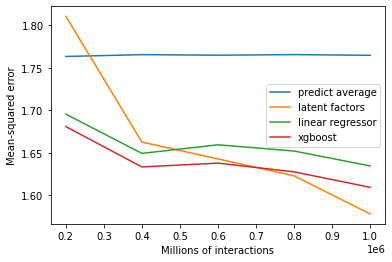

In [ ]:
x = [200000, 400000, 600000, 800000, 1000000]
plt.plot(x, avg_mses, label="predict average")
plt.plot(x, svd_mses, label="latent factors")
plt.plot(x, lin_mses, label="linear regressor")
plt.plot(x, xgb_mses, label="xgboost")
plt.legend()
plt.xlabel("Millions of interactions")
plt.ylabel("Mean-squared error")
plt.show()

In [ ]:
itemIDs = bggid_to_idx
userIDs={}
for d in interactions:
  if not d[2] in userIDs: userIDs[d[2]] = len(userIDs)

nUsers = len(userIDs)
nItems = len(itemIDs)

print(nUsers, nItems)

411375 21925


In [ ]:
X = scipy.sparse.lil_matrix((len(trainset), nUsers + nItems))
for i in range(len(trainset)):
  bggid, rating, username = trainset[i]
  user = userIDs[username]
  item = itemIDs[bggid]
  X[i,user] = 1
  X[i,item + nUsers] = 1

y = [float(rating) for _, rating, _ in trainset]

In [ ]:
X = []
for i in range(len(trainset)):
  bggid, rating, username = trainset[i]
  user = userIDs[username]
  item = itemIDs[bggid]
  X.append([user, item])

y = [float(rating) for _, rating, _ in trainset]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
xgb_mod = XGBRegressor(objective='reg:squarederror').fit(X_train, y_train)
print(mse(xgb_mod.predict(X_test), y_test))

2.1857676268673973
